# Installing / Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
matplotlib.rcParams['figure.figsize'] = (10,5)

In [3]:
path = 'C:/Users/manal/Desktop/Thesis/Manali-CallsPrediction/ml-generic-thesis-project-structure-main/01-raw-data'
df_Inquiries = pd.read_csv(path+'/CallCenter_Inquiries.csv', sep=',', header=0, parse_dates=True)
df_Inquiries

,Unnamed: 0,date,date_time,inquiry_name,brief_description,YEAR,Month,Day_of_Month,Day_of_Year,Quarter,Weekday,time_hour
0,951,2017-01-01T00:00:00.000,2017-01-01T00:00:05.000,Language Assistance,Connect to Language Line.,2017,1,1,1,1,Sunday,0
1,854,2017-01-01T00:00:00.000,2017-01-01T00:01:12.000,Vehicle Blocking Driveway Complaint,Report a vehicle that is blocking a driveway.,2017,1,1,1,1,Sunday,0
2,697,2017-01-01T00:00:00.000,2017-01-01T00:01:41.000,Apartment Maintenance Complaint,Report a maintenance problem inside an apartment.,2017,1,1,1,1,Sunday,0
3,617,2017-01-01T00:00:00.000,2017-01-01T00:02:01.000,Noise from Neighbor,Report a noisy neighbor.,2017,1,1,1,1,Sunday,0
4,720,2017-01-01T00:00:00.000,2017-01-01T00:02:08.000,Find a Police Precinct or PSA by Name,Find a specific precinct or police service are...,2017,1,1,1,1,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29888780,30268221,2022-10-01T00:00:00.000,2022-10-01T01:25:29.000,Elevator or Escalator Complaint,Report a problem with an elevator or escalator.,2022,10,1,274,4,Saturday,1
29888781,30268291,2022-10-01T00:00:00.000,2022-10-01T01:27:32.000,Dirty Sidewalk,"Report a sidewalk or gutter, including 18 inch...",2022,10,1,274,4,Saturday,1
29888782,30268292,2022-10-01T00:00:00.000,2022-10-01T01:27:32.000,Dirty Yard or Alley,"Report an unclean or untidy yard, alley, or co...",2022,10,1,274,4,Saturday,1
29888783,30268243,2022-10-01T00:00:00.000,2022-10-01T01:28:13.000,Animal Abuse,Report abuse or neglect of an animal.,2022,10,1,274,4,Saturday,1


## Changing the datatypes 

In [4]:
from datetime import datetime, date 
df_Inquiries['date'] = pd.to_datetime(df_Inquiries['date'])
df_Inquiries['date_time'] = pd.to_datetime(df_Inquiries['date_time'])

In [5]:
df_Inquiries.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29888785 entries, 0 to 29888784
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Unnamed: 0         int64         
 1   date               datetime64[ns]
 2   date_time          datetime64[ns]
 3   inquiry_name       object        
 4   brief_description  object        
 5   YEAR               int64         
 6   Month              int64         
 7   Day_of_Month       int64         
 8   Day_of_Year        int64         
 9   Quarter            int64         
 10  Weekday            object        
 11  time_hour          int64         
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 2.7+ GB


In [6]:
df_Inquiries.isnull().sum()

Unnamed: 0           0
date                 0
date_time            0
inquiry_name         0
brief_description    0
YEAR                 0
Month                0
Day_of_Month         0
Day_of_Year          0
Quarter              0
Weekday              0
time_hour            0
dtype: int64

In [7]:
df_Inquiries_indexed = df_Inquiries.set_index('date_time')

In [8]:
df_Inquiries_indexed.head(2)

,Unnamed: 0,date,inquiry_name,brief_description,YEAR,Month,Day_of_Month,Day_of_Year,Quarter,Weekday,time_hour
date_time,,,,,,,,,,,
2017-01-01 00:00:05,951,2017-01-01,Language Assistance,Connect to Language Line.,2017,1,1,1,1,Sunday,0
2017-01-01 00:01:12,854,2017-01-01,Vehicle Blocking Driveway Complaint,Report a vehicle that is blocking a driveway.,2017,1,1,1,1,Sunday,0


# Target setting

In [9]:
Stats_Univariate_data = df_Inquiries.groupby(['date'],as_index=False).size().rename(columns={'size':'Inquiries'})

In [10]:
Stats_Univariate_data

,date,Inquiries
0,2017-01-01,7574
1,2017-01-02,13189
2,2017-01-03,24678
3,2017-01-04,23380
4,2017-01-05,22809
...,...,...
2088,2022-09-27,11598
2089,2022-09-28,11886
2090,2022-09-29,11772
2091,2022-09-30,10669


In [11]:
Stats_Univariate_data = Stats_Univariate_data.set_index('date')

# Simply Moving Average

Simply Moving Average = (t+(t-1)+(t-2)+....+(t-n))/n

n is the number of period (window) which we want to average

In [12]:
Stats_Univariate_data['SMA'] = Stats_Univariate_data['Inquiries'].rolling(window=3).mean()

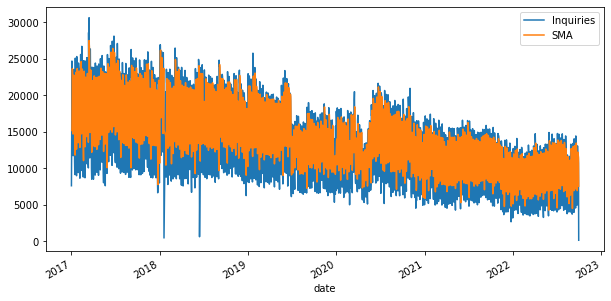

In [13]:
Stats_Univariate_data.plot()
plt.show()

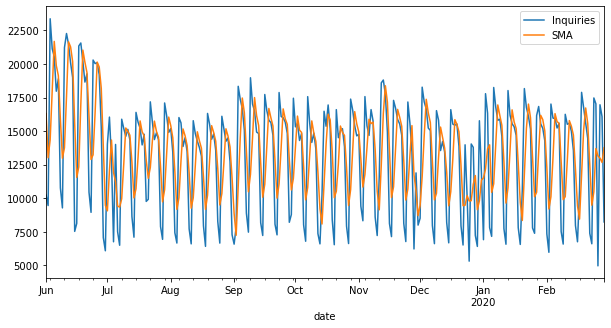

In [14]:
Stats_Univariate_data.loc['2019-06':'2020-02'].plot()
plt.show()

In [15]:
Stats_Univariate_data.loc['2019-06-20':'2020-01-02']

,Inquiries,SMA
date,,
2019-06-20,18652,20136.000000
2019-06-21,19265,19369.666667
2019-06-22,10449,16122.000000
2019-06-23,8948,12887.333333
2019-06-24,20295,13230.666667
...,...,...
2019-12-29,6409,9145.000000
2019-12-30,15772,9806.000000
2019-12-31,11864,11348.333333


# Weighted Moving Average
Weighted Moving Average = (t * weighting factor) + ((t-1) * weighting factor-1) + ((t-n) * weighting factor-n)/n

In [16]:
def wma(weights):
    def calc(x):
        return (weights * x).mean()
    return calc

In [17]:
Stats_Univariate_data['WMA'] = Stats_Univariate_data['Inquiries'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

In [18]:
Stats_Univariate_data

,Inquiries,SMA,WMA
date,,,
2017-01-01,7574,NaN,NaN
2017-01-02,13189,NaN,NaN
2017-01-03,24678,15147.000000,17997.666667
2017-01-04,23380,20415.666667,22114.166667
2017-01-05,22809,23622.333333,23310.833333
...,...,...,...
2022-09-27,11598,9886.666667,10982.500000
2022-09-28,11886,12174.333333,11982.166667
2022-09-29,11772,11752.000000,11781.000000


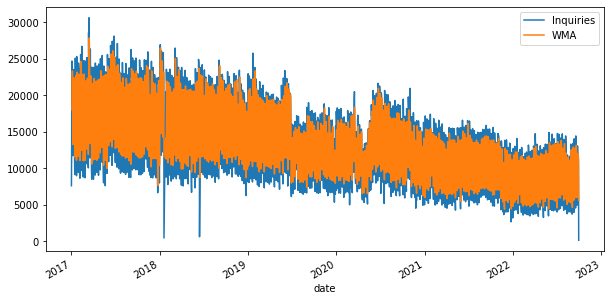

In [19]:
Stats_Univariate_data.drop(columns=['SMA']).plot()
plt.show()

# Exponential Moving Average
Exponential Moving Average = (Close - Previous EMA) * (2/(Span+1)) + Previous EMA

Span is duration for which we want to calculate EMA

In [20]:
Stats_Univariate_data['EWM'] = Stats_Univariate_data['Inquiries'].ewm(adjust=False, span=3, min_periods=0).mean()

In [21]:
Stats_Univariate_data

,Inquiries,SMA,WMA,EWM
date,,,,
2017-01-01,7574,NaN,NaN,7574.000000
2017-01-02,13189,NaN,NaN,10381.500000
2017-01-03,24678,15147.000000,17997.666667,17529.750000
2017-01-04,23380,20415.666667,22114.166667,20454.875000
2017-01-05,22809,23622.333333,23310.833333,21631.937500
...,...,...,...,...
2022-09-27,11598,9886.666667,10982.500000,10708.175297
2022-09-28,11886,12174.333333,11982.166667,11297.087649
2022-09-29,11772,11752.000000,11781.000000,11534.543824


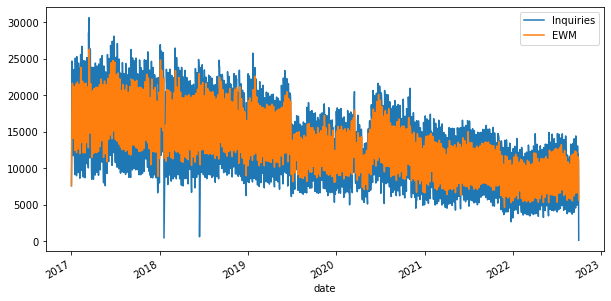

In [22]:
Stats_Univariate_data.drop(columns=['SMA','WMA']).plot()
plt.show()

# Exponential Smoothing
α = smoothing factor of data; 0(weightage to historical data) < α < 1(weightage to most recent data)

In [23]:
Stats_Univariate_data['EWM_s0.7'] = Stats_Univariate_data['Inquiries'].ewm(adjust=False, alpha=0.7, min_periods=0).mean()
Stats_Univariate_data['EWM_s0.7_shift'] = Stats_Univariate_data['Inquiries'].ewm(adjust=False, alpha=0.7, min_periods=0).mean().shift(1)
Stats_Univariate_data['EWM_s0.3'] = Stats_Univariate_data['Inquiries'].ewm(adjust=False, alpha=0.3, min_periods=0).mean()

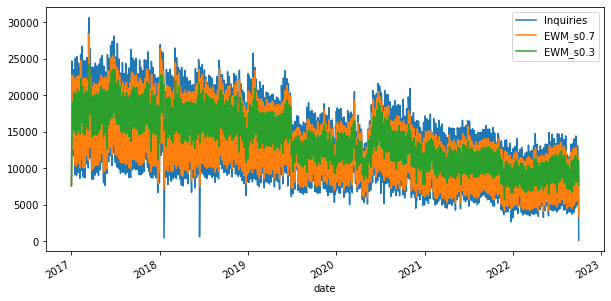

In [24]:
Stats_Univariate_data[['Inquiries','EWM_s0.7','EWM_s0.3']].plot()
plt.show()

# RMSE

In [25]:
((Stats_Univariate_data['Inquiries']-Stats_Univariate_data['SMA'])**2).mean()**0.5

4038.9380615083014

In [26]:
((Stats_Univariate_data['Inquiries']-Stats_Univariate_data['WMA'])**2).mean()**0.5

2867.5289943058337

In [27]:
((Stats_Univariate_data['Inquiries']-Stats_Univariate_data['EWM'])**2).mean()**0.5

2713.2649199709317

In [28]:
rms = mean_squared_error(Stats_Univariate_data['Inquiries'], Stats_Univariate_data['EWM_s0.7'], squared=False)
rms

1642.1419735640825

In [29]:
((Stats_Univariate_data['Inquiries']-Stats_Univariate_data['EWM_s0.3'])**2).mean()**0.5

3681.70314805171

## Exponential Smoothing with alpha 0.7 giving the best RMSE